In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../datafiles/Linear Regression/Ecommerce Customers')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [4]:
df

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


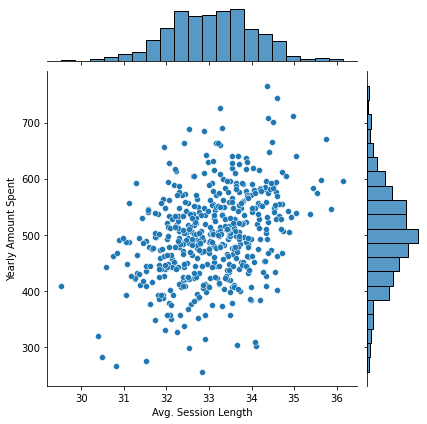

In [5]:
sns.jointplot(data = df, x='Avg. Session Length',y='Yearly Amount Spent')

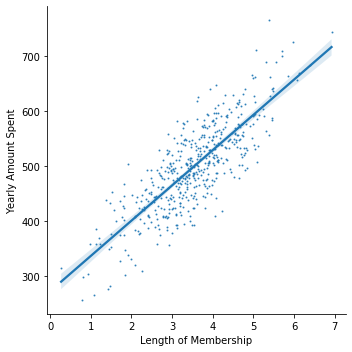

In [5]:
sns.lmplot(data = df,x= 'Length of Membership',y= 'Yearly Amount Spent',scatter_kws={'s':1,'marker':'o'})

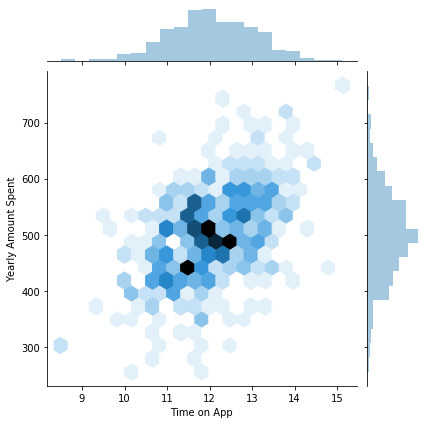

In [39]:
sns.jointplot(df['Time on App'],df['Yearly Amount Spent'], kind = 'hex')

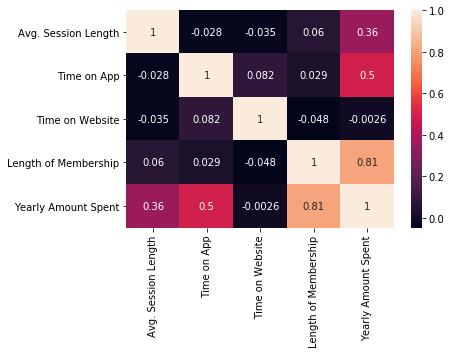

In [51]:
sns.heatmap(df.corr(),annot=True)

In [49]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [6]:
X= df[['Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership']]
Y = df['Yearly Amount Spent']
from sklearn.model_selection import train_test_split
xtr,xte,ytr,yte = train_test_split(X,Y,test_size=0.3,random_state= 101)
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(xtr,ytr)
predic= lr.predict(xte)
pd.DataFrame({'Data':yte,'Prediction':predic})

,Data,Prediction
18,452.315675,456.441861
361,401.033135,402.720053
104,410.069611,409.253154
4,599.406092,591.431034
156,586.155870,590.014373
...,...,...
147,479.731938,478.300766
346,488.387526,484.410296
423,461.112248,457.590999
17,407.704548,411.526576


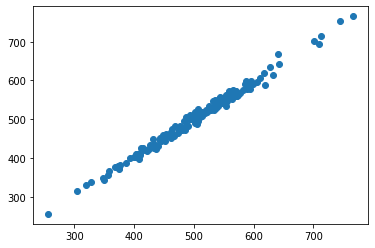

In [70]:
plt.scatter(yte,predic)

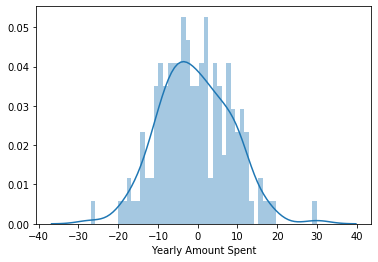

In [84]:
er = yte-predic
sns.distplot(er,bins =50)

In [67]:
pd.Series(lr.coef_,X.columns)

Avg. Session Length     25.981550
Time on App             38.590159
Time on Website          0.190405
Length of Membership    61.279097
dtype: float64

In [81]:
from sklearn import metrics
abs_er = metrics.mean_absolute_error(yte,predic)
sme = metrics.mean_squared_error(yte,predic)
rmse = np.sqrt(sme)

In [83]:
abs_er,sme,rmse

(7.228148653430838, 79.81305165097461, 8.933815066978642)